In [4]:
import pandas as pd

In [6]:
df1 = pd.read_csv("202402-Cyclistic.csv")

In [8]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,start_time
0,8DFA763FBD1BFA61,classic_bike,2/27/24 13:41,2/27/24 13:41,3,31,Dearborn St & Van Buren St,624,Dearborn St & Van Buren St,624,41.876268,-87.629155,41.876268,-87.629155,casual,2/27/24,13.7
1,54E0DC3D0896AA8F,electric_bike,2/25/24 15:01,2/25/24 15:01,1,31,Prospect Sq & 91st St,20103,Prospect Sq & 91st St,20103,41.728032,-87.667597,41.728234,-87.667524,member,2/25/24,15.0
2,53F09CBE8A81E8D1,classic_bike,2/7/24 8:30,2/7/24 8:31,4,31,Canal St & Jackson Blvd,13138,Canal St & Jackson Blvd,13138,41.877245,-87.639366,41.877245,-87.639366,member,2/7/24,8.5
3,9E9D92F60E0926FD,electric_bike,2/27/24 17:31,2/27/24 17:32,3,31,Larrabee St & North Ave,TA1306000008,Larrabee St & North Ave,TA1306000008,41.910142,-87.643504,41.910210,-87.643500,member,2/27/24,17.5
4,D493279A6D83C9A9,classic_bike,2/2/24 13:37,2/2/24 13:38,6,31,Halsted St & Clybourn Ave,331,Dayton St & North Ave,13058,41.909668,-87.648128,41.910578,-87.649422,member,2/2/24,13.6


In [10]:
import matplotlib.pyplot as plt

In [12]:
df1_weekday_count = df1[['day_of_week','member_casual']].value_counts()

In [14]:
df1_weekday_count.head(14)

day_of_week  member_casual
5            member           35369
3            member           30931
4            member           28712
2            member           25472
6            member           22594
1            member           16830
7            member           14159
5            casual            7971
3            casual            7497
1            casual            7024
4            casual            6363
6            casual            6362
2            casual            6309
7            casual            5043
Name: count, dtype: int64

In [16]:
weekday_count_df = df1_weekday_count.reset_index()
weekday_count_df.columns = ['day_of_week', 'member_casual' , 'count']
weekday_count_df.head(15)

,day_of_week,member_casual,count
0,5,member,35369
1,3,member,30931
2,4,member,28712
3,2,member,25472
4,6,member,22594
5,1,member,16830
6,7,member,14159
7,5,casual,7971
8,3,casual,7497
9,1,casual,7024


In [18]:
pivot_df1 = weekday_count_df.pivot_table(index='day_of_week' , columns='member_casual' , values='count')
pivot_df1

member_casual,casual,member
day_of_week,,
1,7024.0,16830.0
2,6309.0,25472.0
3,7497.0,30931.0
4,6363.0,28712.0
5,7971.0,35369.0
6,6362.0,22594.0
7,5043.0,14159.0


In [20]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_df1['weekday'] = weekday

<Axes: xlabel='weekday'>

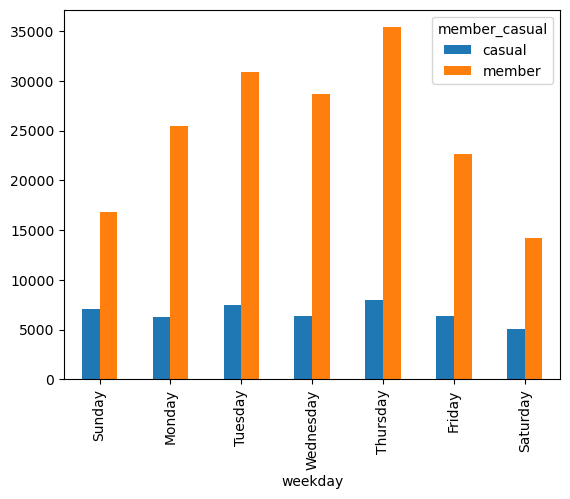

In [22]:
pivot_df1.plot(kind='bar' , x='weekday')

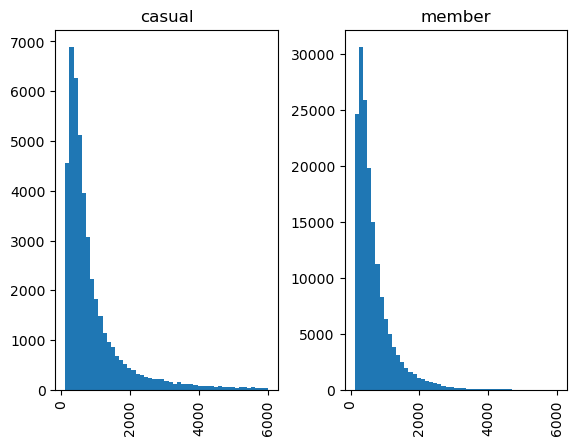

In [24]:
df1.hist(column='ride_length', bins=[120,240,360,480,600,720,840,960,1080,1200,1320,1440,1560,1680,1800,1920,2040,2160,2280,2400,2520,2640,2760,2880,3000,3120,3240,3360,3480,3600,3720,3840,3960,4080,4200,4320,4440,4560,4680,4800,4920,5040,5160,5280,5400,5520,5640,5760,5880,6000], by='member_casual')
plt.show()

In [26]:
df1_weekday_bike_membership = df1[['day_of_week','member_casual' , 'rideable_type']].value_counts()

In [28]:
weekday_bike_membership = df1_weekday_bike_membership.reset_index()

In [30]:
weekday_bike_membership.columns = ['day_of_week' , 'member_casual' , 'rideable_type' , 'count']

In [32]:
pivot_wbm = weekday_bike_membership.pivot_table(index = 'day_of_week' , columns = ['member_casual' , 'rideable_type'] , values = 'count')

In [34]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_wbm['weekday'] = weekday

<Axes: xlabel='weekday'>

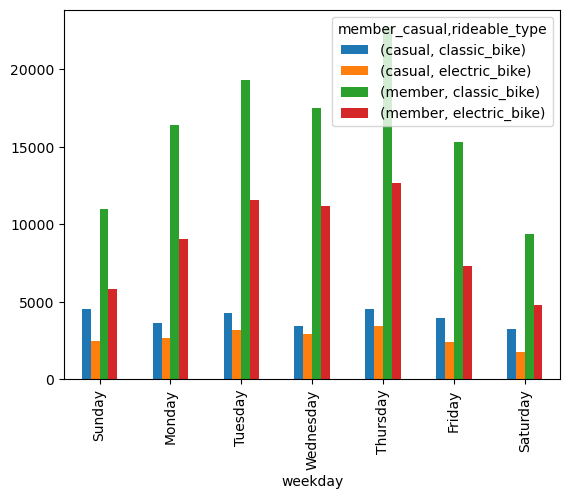

In [36]:
pivot_wbm.plot(kind = 'bar' , x='weekday')

In [38]:
import folium

In [40]:
from folium.plugins import HeatMap

In [42]:
m = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)


In [44]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_data = member_geo_data[['start_lat' , 'start_lng']]

In [46]:
member_geo_data.head()

,start_lat,start_lng
1,41.728032,-87.667597
2,41.877245,-87.639366
3,41.910142,-87.643504
4,41.909668,-87.648128
5,41.937582,-87.644098


In [48]:
HeatMap(member_geo_data).add_to(m)

In [50]:
m.save('heatmapmember-Februray.html')

In [52]:
casual_geo_data = df1[df1['member_casual']=='casual']
casual_geo_route = casual_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]
casual_geo_data = casual_geo_data[['start_lat' , 'start_lng']]

In [68]:
m1 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [70]:
HeatMap(casual_geo_data).add_to(m1)

In [72]:
m1.save('heatmapcasual-February.html')

In [78]:
m2 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [80]:
casual_geo_route.head()

,start_lat,start_lng,end_lat,end_lng
0,41.876268,-87.629155,41.876268,-87.629155
14,41.891847,-87.620580,41.891847,-87.620580
15,41.902309,-87.627691,41.902309,-87.627691
16,41.876665,-87.620483,41.876665,-87.620483
19,41.873061,-87.669135,41.873061,-87.669135


In [82]:
casual_geo_route = casual_geo_route.dropna()
for index in casual_geo_route.index:
    route = [[casual_geo_route.loc[index, 'start_lat'] ,casual_geo_route.loc[index,'start_lng']] , [casual_geo_route.loc[index,'end_lat'], casual_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.3 , opacity = 0.2).add_to(m2)

In [84]:
m2.save('routesCasual-February.html')

([<matplotlib.axis.XTick at 0x1769584d0>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10'),
  Text(12, 0, '12'),
  Text(14, 0, '14'),
  Text(16, 0, '16'),
  Text(18, 0, '18'),
  Text(20, 0, '20'),
  Text(22, 0, '22'),
  Text(24, 0, '24')])

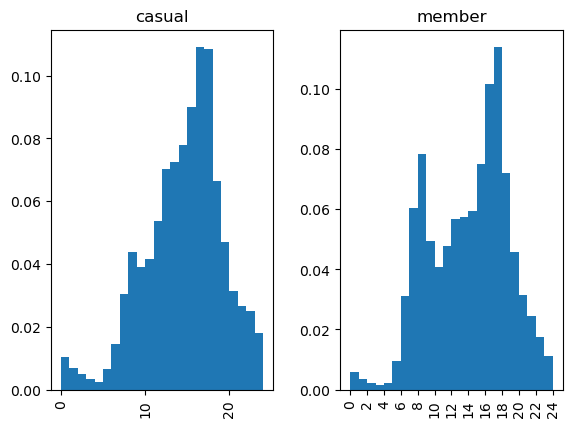

In [26]:
df1.hist(column='start_time', bins=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0],density=True, by='member_casual')
plt.xticks(ticks=[0,2,4,6,8,10,12,14,16,18,20,22,24])